In [1]:
import pandas as pd
import altair as alt
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#these are the shapes for all districts /landkreise in Germany
kreise=gpd.read_file("../CleanedData/kreisebene/vg1000-ew_ebenen_3112/VG1000_KRS.shp")
kreise

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,000,R,DEF01,010010000000,01001000,2008-01-01,89504,56.73,DEBKGDL1000055UK,"POLYGON ((527845.389 6073764.748, 527876.357 6..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,000,R,DEF02,010020000000,01002000,2006-01-01,247548,118.65,DEBKGDL1000055TK,"POLYGON ((577156.386 6029965.651, 577409.884 6..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,000,R,DEF03,010030000000,01003000,2006-02-01,217198,214.19,DEBKGDL1000055W1,"POLYGON ((623679.404 5980679.433, 623686.814 5..."
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,000,R,DEF04,010040000000,01004000,1970-04-26,79487,71.66,DEBKGDL10000560Q,"POLYGON ((566715.395 5999604.702, 566420.237 5..."
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,000,R,DEF05,010510000000,01051000,2011-08-01,133210,1428.18,DEBKGDL10000563M,"MULTIPOLYGON (((504610.324 6023877.016, 504792..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,2,1,04012,04012,040120000000,Bremerhaven,Kreisfreie Stadt,40,--,...,000,R,DE502,040120000000,04012000,2010-01-01,0,0.00,DEBKGDL10000561H,"POLYGON ((471814.165 5932293.362, 471863.561 5..."
421,4,2,1,13003,13003,130030000000,Rostock,Kreisfreie Stadt,40,--,...,000,R,DE803,130030000000,13003000,2007-01-01,0,0.00,DEBKGDL1000055TM,"POLYGON ((703801.512 6007776.641, 704102.680 6..."
422,4,2,1,13073,13073,130730088088,Vorpommern-Rügen,Landkreis,43,--,...,000,R,DE80L,130730000000,13073000,2011-09-04,0,0.00,DEBKGDL100007C38,"MULTIPOLYGON (((722555.301 6030475.859, 722962..."
423,4,2,1,13074,13074,130740087087,Nordwestmecklenburg,Landkreis,43,--,...,000,R,DE80M,130740000000,13074000,2011-09-04,0,0.00,DEBKGDL100005C67,"POLYGON ((648041.522 5983280.322, 647909.988 5..."


In [3]:
#this is assembled data for all people classified as asylumseekers/Schutzsuchende
data=pd.read_csv("../CleanedData/schutzsuchende_nations_kreis.csv",dtype={"AGS":str})
data

,Stichtag,AGS,Stadtname,Herkunft,Offener Schutzstatus_männlich,Offener Schutzstatus_weiblich,Anerkannter Schutzstatus_männlich,Anerkannter Schutzstatus_weiblich,Befristet anerkannter Schutzstatus_männlich,Befristet anerkannter Schutzstatus_weiblich,...,Unbefristet anerkannter Schutzstatus_weiblich,Ohne Schutzsstatus_männlich,Ohne Schutzsstatus_weiblich,Geduldet ausreisepflichtig_männlich,Geduldet ausreisepflichtig_weiblich,Latent ausreispflichtig_männlich,Latent ausreispflichtig_weiblich,Vollziehbar ausreisepflichtig_männlich,Vollziehbar ausreisepflichtig_weiblich,Schutzsuchende_alle_Status
0,31.12.2019,01001,"Flensburg, kreisfreie Stadt",Ägypten,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31.12.2019,01001,"Flensburg, kreisfreie Stadt",Äquatorialguinea,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,31.12.2019,01001,"Flensburg, kreisfreie Stadt",Äthiopien,NaN,NaN,5.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,31.12.2019,01001,"Flensburg, kreisfreie Stadt",Afghanistan,55.0,10.0,220.0,120.0,215.0,110.0,...,10.0,95.0,10.0,80.0,10.0,5.0,NaN,15.0,NaN,510.0
4,31.12.2019,01001,"Flensburg, kreisfreie Stadt",Albanien,NaN,NaN,5.0,5.0,5.0,NaN,...,NaN,15.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693051,31.12.2018,16077,"Altenburger Land, Landkreis",Zentralafrikanische Republik,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
693052,31.12.2018,16077,"Altenburger Land, Landkreis",Zypern,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
693053,31.12.2018,16077,"Altenburger Land, Landkreis",Staatenlos,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
693054,31.12.2018,16077,"Altenburger Land, Landkreis",Ungeklärt,NaN,NaN,10.0,10.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [4]:
#for all Syrian refugees registered since 2016 and that live either in Berlin (11) or Brandenburg (12)
since2016=data[~data["Stichtag"].isin(["31.12.2013","31.12.2014","31.12.2015"])]
since2016=since2016[since2016["AGS"].str[:2].isin(["11","12"])]
since2016_syrien_data=since2016[since2016["Herkunft"]=="Syrien"]

#we reduce the data to date, cityname, and refugees of all status
since2016_syrien_data=since2016_syrien_data[["Stichtag","Stadtname","Schutzsuchende_alle_Status"]]
#and then pivot accordingly and 
since2016_syrien_data_pivoted=since2016_syrien_data.pivot(index='Stadtname', columns='Stichtag', values='Schutzsuchende_alle_Status')
#also we drop the last entry because it is merged with Cottbus
since2016_syrien_data_pivoted=since2016_syrien_data_pivoted.reset_index().sort_values(by="31.12.2019",ascending=False)
since2016_syrien_data_pivoted=since2016_syrien_data_pivoted.iloc[:-1]

#we remove unneccesary strings
since2016_syrien_data_pivoted["Stadtname"]=since2016_syrien_data_pivoted["Stadtname"].str.replace(", kreisfreie Stadt","")
since2016_syrien_data_pivoted["Stadtname"]=since2016_syrien_data_pivoted["Stadtname"].str.replace(", Landkreis","")

#and then save the data
since2016_syrien_data_pivoted.to_csv("../ChartData/since2016_syrien_data_pivoted.csv",index=False)
since2016_syrien_data_pivoted

Stichtag,Stadtname,31.12.2016,31.12.2017,31.12.2018,31.12.2019
1,Berlin,16125.0,23975.0,26535.0,28665.0
3,Cottbus,1890.0,2400.0,2370.0,2180.0
13,Potsdam,1210.0,1390.0,1660.0,1910.0
11,Oder-Spree,1070.0,1110.0,1155.0,1120.0
9,Oberhavel,835.0,805.0,810.0,770.0
17,Teltow-Fläming,840.0,755.0,705.0,715.0
7,Havelland,650.0,680.0,630.0,715.0
2,Brandenburg an der Havel,455.0,570.0,555.0,655.0
0,Barnim,755.0,515.0,620.0,645.0
6,Frankfurt (Oder),430.0,570.0,655.0,635.0


In [5]:
#also, we want to calculate the diff of asylumseekers vetween 2016 and 2019
data=data[data["AGS"].str[:2].isin(["11","12"])]
syrien_data=data[data["Herkunft"]=="Syrien"]
syrien_data_max=syrien_data[syrien_data["Stichtag"].str[-2:].isin(["19"])].sort_values('Schutzsuchende_alle_Status', ascending=False).drop_duplicates(['AGS'])
syrien_data_max=syrien_data_max[["AGS","Stadtname","Schutzsuchende_alle_Status","Stichtag"]]
syrien_data_min=syrien_data[syrien_data["Stichtag"].str[-2:].isin(["16"])].sort_values('Schutzsuchende_alle_Status', ascending=False).drop_duplicates(['AGS'])
syrien_data_min=syrien_data_min[["AGS","Stadtname","Schutzsuchende_alle_Status","Stichtag"]]
syrien_data_min

,AGS,Stadtname,Schutzsuchende_alle_Status,Stichtag
266830,11000,"Berlin, kreisfreie Stadt",16125.0,31.12.2016
267246,12052,"Cottbus, kreisfreie Stadt",1890.0,31.12.2016
267662,12054,"Potsdam, kreisfreie Stadt",1210.0,31.12.2016
269326,12067,"Oder-Spree, Landkreis",1070.0,31.12.2016
270366,12072,"Teltow-Fläming, Landkreis",840.0,31.12.2016
268910,12065,"Oberhavel, Landkreis",835.0,31.12.2016
267870,12060,"Barnim, Landkreis",755.0,31.12.2016
268494,12063,"Havelland, Landkreis",650.0,31.12.2016
269950,12070,"Prignitz, Landkreis",645.0,31.12.2016
269118,12066,"Oberspreewald-Lausitz, Landkreis",595.0,31.12.2016


In [6]:
#then we merge the datasets for max and min and calculate the diff
syrien_data_max_min=pd.merge(syrien_data_max,syrien_data_min,on=["AGS","Stadtname"],suffixes=["_max","_min"])
syrien_data_max_min["diff"]=syrien_data_max_min["Schutzsuchende_alle_Status_max"]-syrien_data_max_min["Schutzsuchende_alle_Status_min"]
#and save the result
syrien_data_max_min.to_csv("../ChartData/Syrerinnen_min_max.csv", index=False)
syrien_data_max_min.sort_values("diff")

,AGS,Stadtname,Schutzsuchende_alle_Status_max,Stichtag_max,Schutzsuchende_alle_Status_min,Stichtag_min,diff
13,12066,"Oberspreewald-Lausitz, Landkreis",390.0,31.12.2019,595.0,31.12.2016,-205.0
15,12061,"Dahme-Spreewald, Landkreis",345.0,31.12.2019,525.0,31.12.2016,-180.0
16,12062,"Elbe-Elster, Landkreis",340.0,31.12.2019,490.0,31.12.2016,-150.0
17,12068,"Ostprignitz-Ruppin, Landkreis",275.0,31.12.2019,420.0,31.12.2016,-145.0
10,12070,"Prignitz, Landkreis",510.0,31.12.2019,645.0,31.12.2016,-135.0
5,12072,"Teltow-Fläming, Landkreis",715.0,31.12.2019,840.0,31.12.2016,-125.0
14,12073,"Uckermark, Landkreis",380.0,31.12.2019,500.0,31.12.2016,-120.0
8,12060,"Barnim, Landkreis",645.0,31.12.2019,755.0,31.12.2016,-110.0
12,12069,"Potsdam-Mittelmark, Landkreis",470.0,31.12.2019,540.0,31.12.2016,-70.0
4,12065,"Oberhavel, Landkreis",770.0,31.12.2019,835.0,31.12.2016,-65.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


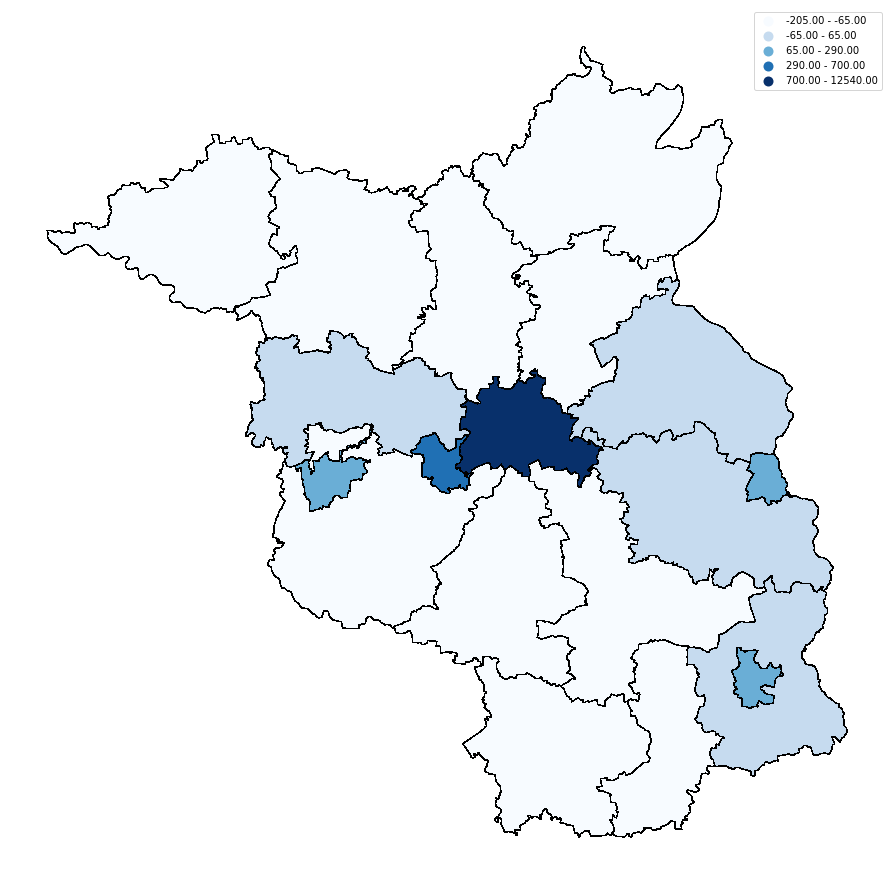

In [7]:
#we visualize it using fisher jenks
country_shapes = kreise.merge(syrien_data_max_min, on='AGS')

country_shapes
color_map = plt.cm.get_cmap('Blues')

country_shapes=country_shapes.to_crs({'init': 'epsg:25832'})

mapp=country_shapes.plot("diff",cmap=color_map,edgecolor='black',scheme='fisherjenks',antialiased=False,legend=True,linewidth=0.5,figsize=(18, 16)).axis('off')
#mapp

In [8]:
#this is a dataset that shows how many people of which naitonality where in Berlin and Brandenburg in 2013
data=pd.read_csv("../CleanedData/nationalitaeten_kreise.csv",dtype={"AGS":str})
prior_syria=data[data["AGS"].str[:2].isin(["11","12"])]
prior_syria

,AGS,Stadt/Kreis,Insgesamt
0,11000,"Berlin, kreisfreie Stadt",3539
1,12051,"Brandenburg an der Havel, kreisfreie Stadt",3
2,12052,"Cottbus, kreisfreie Stadt",102
3,12053,"Frankfurt (Oder), kreisfreie Stadt",11
4,12054,"Potsdam, kreisfreie Stadt",50
5,12060,"Barnim, Landkreis",14
6,12061,"Dahme-Spreewald, Landkreis",20
7,12062,"Elbe-Elster, Landkreis",13
8,12063,"Havelland, Landkreis",20
9,12064,"Märkisch-Oderland, Landkreis",26


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


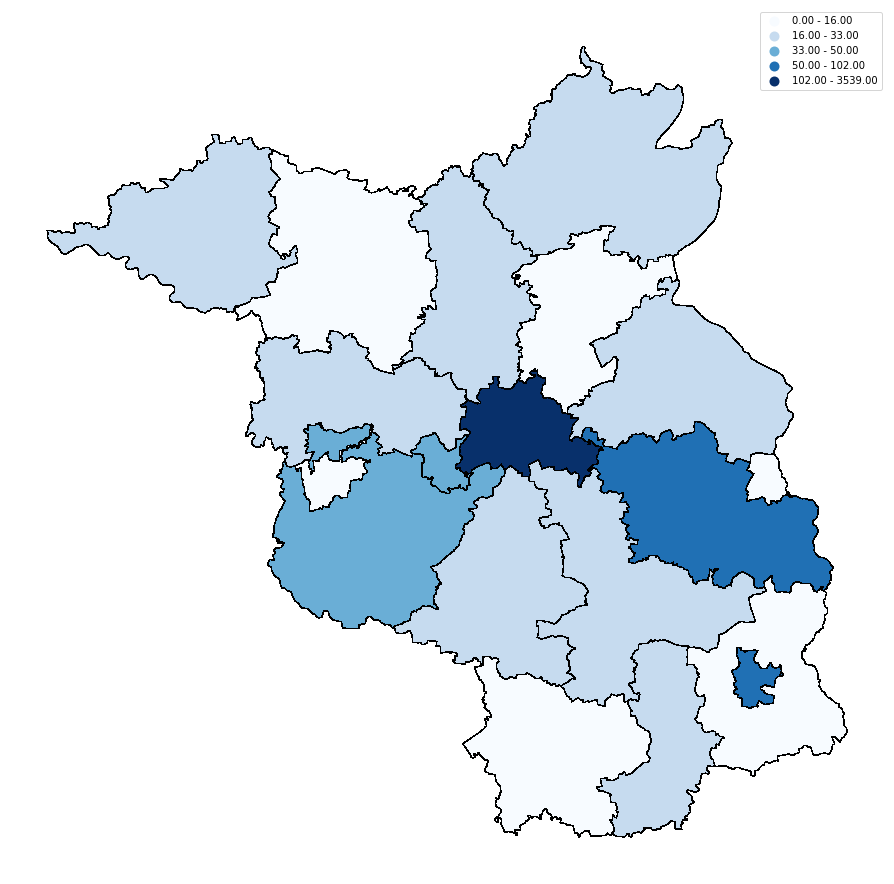

In [9]:

country_shapes = kreise.merge(prior_syria, on='AGS')

country_shapes
color_map = plt.cm.get_cmap('Blues')

country_shapes=country_shapes.to_crs({'init': 'epsg:25832'})

mapp=country_shapes.plot("Insgesamt",cmap=color_map,edgecolor='black',scheme='fisherjenks',antialiased=False,legend=True,linewidth=0.5,figsize=(18, 16)).axis('off')


In [10]:
kreise2019_2014=pd.read_csv("../CleanedData/election2014_2019_LK.csv",dtype={"AGS":str})
kreise2019_2014

,AGS,AfD_%_2019,Stadtname
0,11000,14.2,Berlin
1,12051,21.5,"Brandenburg an der Havel, Stadt"
2,12052,26.8,"Cottbus, Stadt"
3,12053,24.5,"Frankfurt (Oder), Stadt"
4,12054,13.6,"Potsdam, Stadt"
5,12060,22.6,Barnim
6,12061,24.4,Dahme-Spreewald
7,12062,29.0,Elbe-Elster
8,12063,22.0,Havelland
9,12064,24.5,Märkisch-Oderland


In [11]:
wahl=kreise2019_2014
wahl

,AGS,AfD_%_2019,Stadtname
0,11000,14.2,Berlin
1,12051,21.5,"Brandenburg an der Havel, Stadt"
2,12052,26.8,"Cottbus, Stadt"
3,12053,24.5,"Frankfurt (Oder), Stadt"
4,12054,13.6,"Potsdam, Stadt"
5,12060,22.6,Barnim
6,12061,24.4,Dahme-Spreewald
7,12062,29.0,Elbe-Elster
8,12063,22.0,Havelland
9,12064,24.5,Märkisch-Oderland


In [12]:
wahl[["AGS","Stadtname",'AfD_%_2019']].drop_duplicates().sort_values(by="AfD_%_2019").to_csv("../ChartData/Afd_Ergebnisse.csv", index=False)

In [13]:
#import matplotlib.pyplot as plt
country_shapes = kreise.merge(wahl, on='AGS')

country_shapes

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,geometry,AfD_%_2019,Stadtname
0,4,4,1,11000,11000,110000000000,Berlin,Kreisfreie Stadt,40,--,...,DE300,110000000000,11000000,1990-10-03,3644826,891.12,DEBKGDL1000055Z2,"POLYGON ((802560.818 5844872.256, 802601.328 5...",14.2,Berlin
1,4,4,1,12051,12051,120510000000,Brandenburg an der Havel,Kreisfreie Stadt,40,--,...,DE401,120510000000,12051000,2012-10-01,72124,229.71,DEBKGDL1000055UQ,"MULTIPOLYGON (((750389.154 5822827.206, 750379...",21.5,"Brandenburg an der Havel, Stadt"
2,4,4,1,12052,12052,120520000000,Cottbus,Kreisfreie Stadt,40,--,...,DE402,120520000000,12052000,2003-10-26,100219,165.63,DEBKGDL10000561Q,"POLYGON ((866034.442 5759170.471, 866194.190 5...",26.8,"Cottbus, Stadt"
3,4,4,1,12053,12053,120530000000,Frankfurt (Oder),Kreisfreie Stadt,40,--,...,DE403,120530000000,12053000,2002-05-31,57873,147.85,DEBKGDL1000055XJ,"POLYGON ((872442.138 5819415.834, 874939.750 5...",24.5,"Frankfurt (Oder), Stadt"
4,4,4,1,12054,12054,120540000000,Potsdam,Kreisfreie Stadt,40,--,...,DE404,120540000000,12054000,2014-09-11,178089,188.25,DEBKGDL1000055YY,"POLYGON ((775681.299 5820229.518, 775699.551 5...",13.6,"Potsdam, Stadt"
5,4,4,1,12060,12060,120600052052,Barnim,Landkreis,43,--,...,DE405,120600000000,12060000,2009-01-01,182760,1479.61,DEBKGDL1000055Z1,"POLYGON ((825669.930 5889605.199, 826632.350 5...",22.6,Barnim
6,4,4,1,12061,12061,120610316316,Dahme-Spreewald,Landkreis,43,--,...,DE406,120610000000,12061000,2015-01-19,169067,2274.53,DEBKGDL1000055U8,"POLYGON ((804475.951 5815218.092, 804738.876 5...",24.4,Dahme-Spreewald
7,4,4,1,12062,12062,120620224224,Elbe-Elster,Landkreis,43,--,...,DE407,120620000000,12062000,2009-01-01,102638,1899.16,DEBKGDL1000055YC,"POLYGON ((788789.858 5756294.795, 789238.545 5...",29.0,Elbe-Elster
8,4,4,1,12063,12063,120630252252,Havelland,Landkreis,43,--,...,DE408,120630000000,12063000,2012-10-01,161909,1727.31,DEBKGDL1000055YZ,"POLYGON ((743338.349 5855179.156, 743546.142 5...",22.0,Havelland
9,4,4,1,12064,12064,120640448448,Märkisch-Oderland,Landkreis,43,--,...,DE409,120640000000,12064000,2009-01-01,194328,2158.65,DEBKGDL10000564G,"POLYGON ((844736.924 5873285.616, 844974.433 5...",24.5,Märkisch-Oderland


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


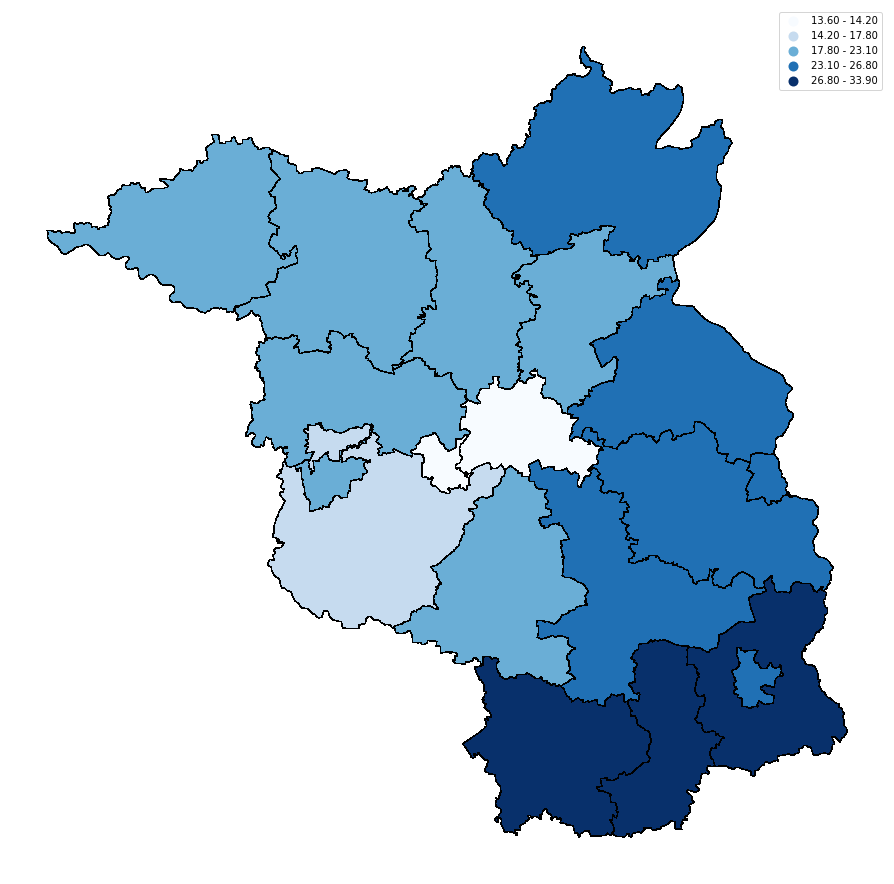

In [14]:
color_map = plt.cm.get_cmap('Blues')

country_shapes=country_shapes.to_crs({'init': 'epsg:25832'})

mapp=country_shapes.plot("AfD_%_2019",cmap=color_map,edgecolor='black',scheme='fisherjenks',antialiased=False,legend=True,linewidth=0.5,figsize=(18, 16)).axis('off')
#mapp

In [15]:
wirtschaft=pd.read_csv("../CleanedData/wirtschafts_indikatoren_3.csv",dtype={"Regional-schlüssel":str})

wirtschaft=wirtschaft.rename(columns={"Regional-schlüssel":"AGS"})
wirtschaft=wirtschaft[wirtschaft["AGS"].str[:2].isin(["11","12"])]
wirtschaft

,Lfd. Nr.,EU-Code,AGS,Land,NUTS 1,NUTS 2,NUTS 3,Gebietseinheit,years,1.1 Primäreinkommen der privaten Haushalte,1.2 Primäreinkommen der privaten Haushalte,1.3 Primäreinkommen der privaten Haushalte,1.4 Primäreinkommen der privaten Haushalte je Einwohner,2.1 Verfügbares Einkommen der privaten Haushalte,2.2 Verfügbares Einkommen der privaten Haushalte,2.3 Verfügbares Einkommen der privaten Haushalte,2.4 Verfügbares Einkommen der privaten Haushalte je Einwohner,3 Einwohner
153,154,DE3,11,BE,1.0,2.0,3.0,Berlin,1995.0,61273.508,.,100,17842,52774.891,.,100,15367,3434.19
154,155,DE4,12,BB,1.0,2.0,NaN,Brandenburg,1995.0,31953.774,.,100,12627,29755.789,.,100,11758,2530.595
155,156,DE401,12051,BB,NaN,NaN,3.0,"Brandenburg an der Havel, Kreisfreie Stadt",1995.0,1025.623,.,3.2097084995343583,11709,1014.089,.,3.408039356644181,11577,87.595
156,157,DE402,12052,BB,NaN,NaN,3.0,"Cottbus, Kreisfreie Stadt",1995.0,1712.411,.,5.359025822740062,13477,1510.109,.,5.075009101590282,11885,127.064
157,158,DE403,12053,BB,NaN,NaN,3.0,"Frankfurt (Oder), Kreisfreie Stadt",1995.0,1037.667,.,3.247400447909533,12752,933.243,.,3.1363409654504544,11469,81.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,169,DE40E,12069,BB,NaN,NaN,3.0,"Potsdam-Mittelmark, Landkreis",2017.0,5825.427,4.457563392575992,10.62091130584697,27387.0,4831.663,4.489513015063594,9.558299406125492,22715.0,212.708
9937,170,DE40F,12070,BB,NaN,NaN,3.0,"Prignitz, Landkreis",2017.0,1420.849,5.248307959202862,2.590490140551304,18325.0,1493.201,4.55454765064016,2.9539440626397147,19258.0,77.538
9938,171,DE40G,12071,BB,NaN,NaN,3.0,"Spree-Neiße, Landkreis",2017.0,2311.792,4.170202028167253,4.214856316896012,19905.0,2341.017,3.7470999993352194,4.631146957233914,20157.0,116.141
9939,172,DE40H,12072,BB,NaN,NaN,3.0,"Teltow-Fläming, Landkreis",2017.0,3717.235,4.325487291590264,6.777258257289992,22416.0,3318.591,4.093619896345217,6.565045282436587,20012.0,165.831


In [16]:
wirtschaft=wirtschaft[wirtschaft["years"]==2017]
wirtschaft["Einkommen"]=pd.to_numeric(wirtschaft["2.4 Verfügbares Einkommen der privaten Haushalte je Einwohner"])
wirtschaft
wirtschaft["AGS"]=wirtschaft["AGS"].str.ljust(5, '0')
wirtschaft=wirtschaft[wirtschaft["AGS"]!="12000"]
wirtschaft=wirtschaft[["AGS","Gebietseinheit","Einkommen"]]
wirtschaft.to_csv("../ChartData/Einkommen.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


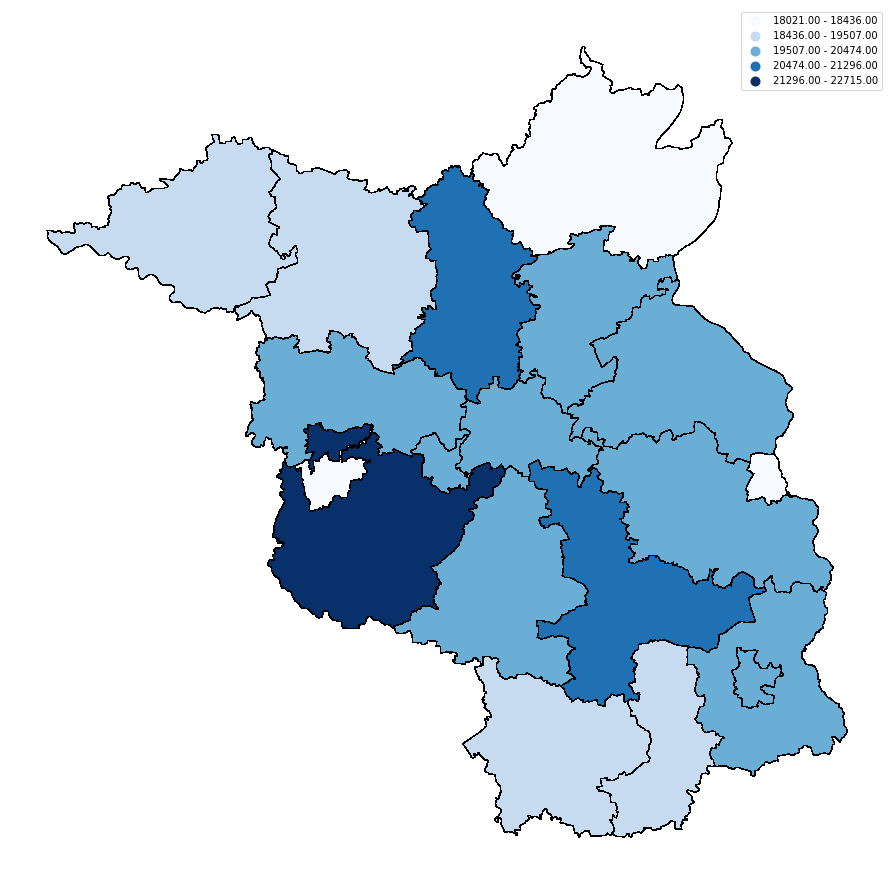

In [17]:
#import matplotlib.pyplot as plt
country_shapes = kreise.merge(wirtschaft, on='AGS')

country_shapes
color_map = plt.cm.get_cmap('Blues')

country_shapes=country_shapes.to_crs({'init': 'epsg:25832'})

mapp=country_shapes.plot("Einkommen",cmap=color_map,edgecolor='black',scheme='fisherjenks',antialiased=False,legend=True,linewidth=0.5,figsize=(18, 16)).axis('off')
#mapp

In [18]:
arbeitslosigkeit=pd.read_csv("../CleanedData/arbeitslosigkeit_2019.csv",dtype={"AGS":str})
arbeitslosigkeit.to_csv("../ChartData/arbeitslosigkeit.csv", index=False)
arbeitslosigkeit

,Unnamed: 0,AGS,Stadt,Jahres-durch-schnitt
0,0,11000,"Berlin, Stadt",7.8
1,1,12051,"Brandenburg an der Havel, St.",8.1
2,2,12052,"Cottbus, Stadt",7.6
3,3,12053,"Frankfurt (Oder), Stadt",7.9
4,4,12054,"Potsdam, Stadt",5.4
5,5,12060,Barnim,5.1
6,6,12061,Dahme-Spreewald,3.7
7,7,12062,Elbe-Elster,6.0
8,8,12063,Havelland,5.2
9,9,12064,Märkisch-Oderland,5.4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


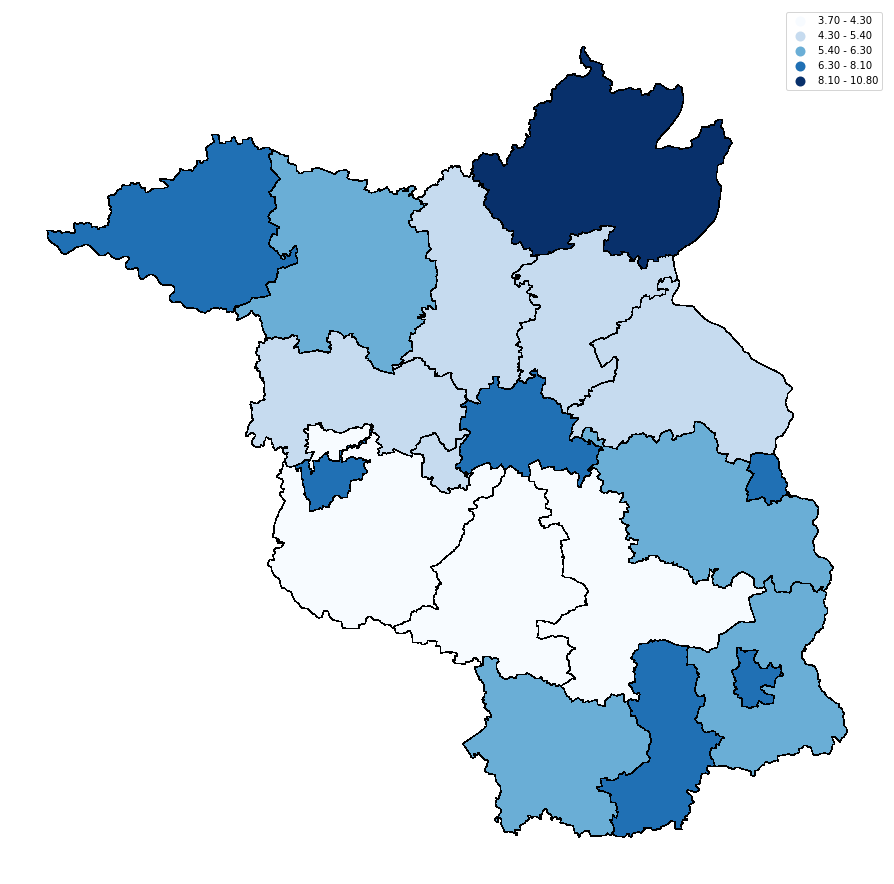

In [19]:
#import matplotlib.pyplot as plt
country_shapes = kreise.merge(arbeitslosigkeit, on='AGS')

country_shapes
color_map = plt.cm.get_cmap('Blues')

country_shapes=country_shapes.to_crs({'init': 'epsg:25832'})

mapp=country_shapes.plot("Jahres-durch-schnitt",cmap=color_map,edgecolor='black',scheme='fisherjenks',antialiased=False,legend=True,linewidth=0.5,figsize=(18, 16)).axis('off')
#mapp